In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://github.com/Dguz06/Dylan-Guzman-Project-Portfolio/raw/refs/heads/main/Projects/MLB%20%22Hot%20Hand%22%20Analysis/Splits%20Leaderboard%20Data%20.csv"
table = pd.read_csv(url)
table1 = table.copy()
table1["OBP"] = (table1["H"] + table1["BB"] + table1["HBP"]) / table1["PA"]
table1["SLG"] = (4*table1["HR"] + 3*table1["3B"] + 2*table1["2B"] + table1["1B"]) / table1["AB"]
table1["OPS"] = table1["OBP"] + table1["SLG"]
table1["TB"] = 4*table1["HR"] + 3*table1["3B"] + 2*table1["2B"] + table1["1B"]
table1["TOB"] = table1["H"] + table1["BB"] + table1["HBP"]
table1['Cumul_TB'] = table1.groupby('Name')['TB'].cumsum()
table1['Cumul_AB'] = table1.groupby('Name')['AB'].cumsum()
table1['Cumul_TOB'] = table1.groupby('Name')['TOB'].cumsum()
table1['Cumul_PA'] = table1.groupby('Name')['PA'].cumsum()
table1['Cumul_OPS'] = (table1['Cumul_TB'] / table1['Cumul_AB']) + (table1['Cumul_TOB'] / table1["Cumul_PA"])
table1['Cumul_G'] = table1.groupby('Name')['G'].cumsum()

table1 = table1.fillna(0)
table1.sort_values(by="Name")

,Date,Name,Tm,G,PA,AB,H,1B,2B,3B,...,SLG,OPS,TB,TOB,Cumul_TB,Cumul_AB,Cumul_TOB,Cumul_PA,Cumul_OPS,Cumul_G
4400,2023-04-15,AJ Pollock,SEA,1,2,2,0,0,0,0,...,0.000000,0.000000,0,0,9,21,6,25,0.668571,8
14330,2023-05-22,AJ Pollock,SEA,1,4,2,0,0,0,0,...,0.000000,0.500000,0,2,27,81,20,91,0.553114,29
7975,2023-04-29,AJ Pollock,SEA,1,2,2,0,0,0,0,...,0.000000,0.000000,0,0,14,51,9,55,0.438146,17
1518,2023-04-04,AJ Pollock,SEA,1,4,4,2,0,0,0,...,2.000000,2.500000,8,2,8,10,3,11,1.072727,3
21144,2023-06-17,AJ Pollock,SEA,1,1,1,0,0,0,0,...,0.000000,0.000000,0,0,32,105,26,116,0.528900,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29724,2023-07-22,Zack Short,DET,1,4,3,1,1,0,0,...,0.333333,0.833333,1,2,43,135,41,150,0.591852,54
29012,2023-07-19,Zack Short,DET,1,4,4,0,0,0,0,...,0.000000,0.000000,0,0,42,132,39,146,0.585305,53
19734,2023-06-12,Zack Short,DET,1,5,5,2,2,0,0,...,0.400000,0.800000,2,2,30,67,26,75,0.794428,27
41239,2023-09-03,Zack Short,DET,1,4,3,0,0,0,0,...,0.000000,0.000000,0,0,70,195,64,219,0.651212,80


In [3]:
'''
This function will find the percentage of games where players met certain requirements. Those requirements being the
three arguments of the function. pa is the minimum total number of plate appearances a player must have prior to the
game, pops is the minimum OPS a player must have over the course of the season going into the game, and bm is the
minimum OPS the player must have in the game.
We find that players with at least 250 plate appearances and a .734 (league-average) OPS going into a game had an OPS
above league-average in that game 46.8% of the time.
'''

def paops(pa, pops, bm=0.734):
    # Filter players with cumulative PA > 249
    filtered_table = table1[table1['Cumul_PA'] > (pa - 1)].copy()


    # Filter players with average OPS > 0.734
    filtered_table = filtered_table[filtered_table['Cumul_OPS'] > pops]

    # Identify rows where OPS > 0.734 in the next game
    filtered_table['OPS_Next_Game_True'] = True

    filtered_table['OPS_Next_Game_High'] = filtered_table.groupby('Name')['OPS'].shift(-1) > bm

    # Count the total number of rows meeting both conditions
    num_games_with_high_ops = filtered_table['OPS_Next_Game_High'].sum()
    num_nxtgms_tot = filtered_table['OPS_Next_Game_True'].sum()
    num_unique_names = filtered_table['Name'].nunique()

    #print("There were " + str(num_nxtgms_tot - num_unique_names) + " total games")
    #print("There were " + str(num_unique_names) + " unique players")
    #print("There were " + str(num_games_with_high_ops) + " games above the benchmark")
    #print((str(num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)) + "% of next games had an above average OPS"))
    y = num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)
    return(y)

paops(250, .734)

np.float64(0.4675096917112793)

In [4]:
'''
This function will find the percentage of games where players met certain requirements. Those requirements being the
five arguments of the function. pa is the minimum total number of plate appearances a player must have prior to the
game. l and lops work together where lops represents the minimum OPS a player had over their last l games. sops is the
minimum OPS a player has over their entire season, and bm is the OPS a player needs in their next game.
'''

def goodszn_badstreak(pa, l, lops, sops = 0.734, bm = 0.734):
    # Sort the DataFrame by 'Player_Name' and 'Game_Date' (if available)
    table2 = table1.copy()
    table2 = table2.sort_values(by=['Name', 'Date'])

    # Calculate the cumulative sum for each player over the last five games
    table2['L5_TB'] = table2.groupby('Name')['TB'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_AB'] = table2.groupby('Name')['AB'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_PA'] = table2.groupby('Name')['PA'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_TOB'] = table2.groupby('Name')['TOB'].transform(lambda x: x.rolling(l, min_periods=1).sum())

    # Calculate OPS for each player over the last five games
    table2['OPS_L5'] = (table2['L5_TB'] / table2['L5_AB']) + (table2['L5_TOB'] / table2['L5_PA']).replace({np.inf: 0})
    table2 = table2[table2['Cumul_PA'] > (pa - 1)].copy()
    table2 =table2[table2['Cumul_G'] >= l]
    table2 = table2[table2['Cumul_OPS'] > sops]
    table2["New_Name"] = table2["Name"] != table2["Name"].shift(-1)
    table2["New_Name"].fillna(False, inplace = True)

    # Drop the temporary cumulative columns if needed
    table2 = table2.drop(['L5_TB', 'L5_AB', 'L5_PA', 'L5_TOB'], axis=1)

    table2['OPS_next_game_high'] = (table2['OPS_L5'] < lops) & (table2.groupby('Name')['OPS'].shift(-1) > bm)
    table3 = table2.copy()
    table3 = table3[table3['OPS_L5'] < lops]

    # Identify rows where OPS > 0.734 in the next game
    table3['OPS_Next_Game_True'] = True

    table2['OPS_nxt_G'] = table2.groupby('Name')['OPS'].shift(-1)

    # Count the total number of rows meeting both conditions
    num_games_with_high_ops = table2['OPS_next_game_high'].sum()
    num_nxtgms_tot = table3['OPS_Next_Game_True'].sum()
    num_unique_names = table3['New_Name'].sum()

    #print("There were " + str(num_nxtgms_tot - num_unique_names) + " total games")
    #print("There were " + str(num_unique_names) + " unique players")
    #print("There were " + str(num_games_with_high_ops) + " games above the benchmark")
    #print((str(num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)) + "% of next games had an above average OPS"))
    y = num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)
    return(y)
goodszn_badstreak(250, 5, 0.734)

/tmp/ipython-input-4-4081867518.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table2["New_Name"].fillna(False, inplace = True)


np.float64(0.4559049923026171)

In [5]:

'''
This function works similarly to the last function, except sops is the MAXIMUM OPS a player can have over the course
of their season.

'''

def badszn_goodstreak(pa, l, lops, sops = 0.734, bm = 0.734):
    # Sort the DataFrame by 'Player_Name' and 'Game_Date' (if available)
    table2 = table1.copy()
    table2 = table2.sort_values(by=['Name', 'Date'])

    # Calculate the cumulative sum for each player over the last five games
    table2['L5_TB'] = table2.groupby('Name')['TB'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_AB'] = table2.groupby('Name')['AB'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_PA'] = table2.groupby('Name')['PA'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_TOB'] = table2.groupby('Name')['TOB'].transform(lambda x: x.rolling(l, min_periods=1).sum())

    # Calculate OPS for each player over the last five games
    table2['OPS_L5'] = (table2['L5_TB'] / table2['L5_AB']) + (table2['L5_TOB'] / table2['L5_PA']).replace({np.inf: 0})
    table2 = table2[table2['Cumul_PA'] > (pa - 1)].copy()
    table2 =table2[table2['Cumul_G'] >= l]
    table2 = table2[table2['Cumul_OPS'] < sops]
    table2["New_Name"] = table2["Name"] != table2["Name"].shift(-1)
    table2["New_Name"].fillna(False, inplace = True)

    # Drop the temporary cumulative columns if needed
    table2 = table2.drop(['L5_TB', 'L5_AB', 'L5_PA', 'L5_TOB'], axis=1)

    table2['OPS_next_game_high'] = (table2['OPS_L5'] > lops) & (table2.groupby('Name')['OPS'].shift(-1) > bm)
    table3 = table2.copy()
    table3 = table3[table3['OPS_L5'] > lops]

    # Identify rows where OPS > 0.734 in the next game
    table3['OPS_Next_Game_True'] = True

    table2['OPS_nxt_G'] = table2.groupby('Name')['OPS'].shift(-1)

    # Count the total number of rows meeting both conditions
    num_games_with_high_ops = table2['OPS_next_game_high'].sum()
    num_nxtgms_tot = table3['OPS_Next_Game_True'].sum()
    num_unique_names = table3['New_Name'].sum()

    # print("There were " + str(num_nxtgms_tot - num_unique_names) + " total games")
    # print("There were " + str(num_unique_names) + " unique players")
    # print("There were " + str(num_games_with_high_ops) + " games above the benchmark")
    # print((str(num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)) + "% of next games had an above average OPS"))
    y = num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)
    return(y)
badszn_goodstreak(250, 5, .734)

/tmp/ipython-input-5-1157180694.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table2["New_Name"].fillna(False, inplace = True)


np.float64(0.3712525667351129)

In [6]:
'''
This function finds the percentage of games where a player has an OPS above bm, while have an OPS of lops over their
last l games.

'''


def lastgame(l, lops, bm = 0.734):
    # Sort the DataFrame by 'Player_Name' and 'Game_Date' (if available)
    table2 = table1.copy()
    table2 = table2.sort_values(by=['Name', 'Date'])

    # Calculate the cumulative sum for each player over the last five games
    table2['L5_TB'] = table2.groupby('Name')['TB'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_AB'] = table2.groupby('Name')['AB'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_PA'] = table2.groupby('Name')['PA'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_TOB'] = table2.groupby('Name')['TOB'].transform(lambda x: x.rolling(l, min_periods=1).sum())

    # Calculate OPS for each player over the last five games
    table2['OPS_L5'] = (table2['L5_TB'] / table2['L5_AB']) + (table2['L5_TOB'] / table2['L5_PA']).replace({np.inf: 0})
    table2 =table2[table2['Cumul_G'] >= l]
    table2["New_Name"] = table2["Name"] != table2["Name"].shift(-1)
    table2["New_Name"].fillna(False, inplace = True)

    # Drop the temporary cumulative columns if needed
    table2 = table2.drop(['L5_TB', 'L5_AB', 'L5_PA', 'L5_TOB'], axis=1)

    table2['OPS_next_game_high'] = (table2['OPS_L5'] > lops) & (table2.groupby('Name')['OPS'].shift(-1) > bm)
    table3 = table2.copy()
    table3 = table3[table3['OPS_L5'] > lops]

    # Identify rows where OPS > 0.734 in the next game
    table3['OPS_Next_Game_True'] = True

    table2['OPS_nxt_G'] = table2.groupby('Name')['OPS'].shift(-1)

    # Count the total number of rows meeting both conditions
    num_games_with_high_ops = table2['OPS_next_game_high'].sum()
    num_nxtgms_tot = table3['OPS_Next_Game_True'].sum()
    num_unique_names = table3['New_Name'].sum()

    # print("There were " + str(num_nxtgms_tot - num_unique_names) + " total games")
    # print("There were " + str(num_unique_names) + " unique players")
    # print("There were " + str(num_games_with_high_ops) + " games above the benchmark")
    # print((str(num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)) + "% of next games had an above average OPS"))
    y = num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)
    return(y)
lastgame(5, 0.734)

/tmp/ipython-input-6-706898314.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table2["New_Name"].fillna(False, inplace = True)


np.float64(0.4188364329995231)

In [7]:
'''
This function finds the percentage of games where a player has an OPS above bm, while have an OPS above lops over their
last l games, while also have at least pa plate appearances on the season.

'''


def pa_and_l5(pa, l, lops, bm = 0.734):

    # Assuming table1 is your DataFrame
    # Sort the DataFrame by 'Player_Name' and 'Game_Date' (if available)
    table2 = table1.copy()
    table2 = table2.sort_values(by=['Name', 'Date'])
    table2 = table2[table2["Cumul_PA"] > (pa - 1)]


    # Calculate the cumulative sum for each player over the last five games
    table2['L5_TB'] = table2.groupby('Name')['TB'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_AB'] = table2.groupby('Name')['AB'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_PA'] = table2.groupby('Name')['PA'].transform(lambda x: x.rolling(l, min_periods=1).sum())
    table2['L5_TOB'] = table2.groupby('Name')['TOB'].transform(lambda x: x.rolling(l, min_periods=1).sum())

    # Calculate OPS for each player over the last five games
    table2['OPS_L5'] = (table2['L5_TB'] / table2['L5_AB']) + (table2['L5_TOB'] / table2['L5_PA']).replace({np.inf: 0})
    table2 =table2[table2['Cumul_G'] >= l]
    table2["New_Name"] = table2["Name"] != table2["Name"].shift(-1)
    table2["New_Name"].fillna(False, inplace = True)


    # Drop the temporary cumulative columns if needed
    table2 = table2.drop(['L5_TB', 'L5_AB', 'L5_PA', 'L5_TOB'], axis=1)

    table2['OPS_next_game_high'] = (table2['OPS_L5'] > lops) & (table2.groupby('Name')['OPS'].shift(-1) > bm)
    table3 = table2.copy()
    table3 = table3[table3['OPS_L5'] > lops]

    # Identify rows where OPS > 0.734 in the next game
    table3['OPS_Next_Game_True'] = True

    table2['OPS_nxt_G'] = table2.groupby('Name')['OPS'].shift(-1)

    # Count the total number of rows meeting both conditions
    num_games_with_high_ops = table2['OPS_next_game_high'].sum()
    num_nxtgms_tot = table3['OPS_Next_Game_True'].sum()
    num_unique_names = table3["New_Name"].sum()

    # print("There were " + str(num_nxtgms_tot - num_unique_names) + " total games")
    # print("There were " + str(num_unique_names) + " unique players")
    # print("There were " + str(num_games_with_high_ops) + " games above the benchmark")
    # print((str(num_games_with_high_ops / (num_nxtgms_tot - num_unique_names)) + "% of next games had an above average OPS"))
    y = (num_games_with_high_ops / (num_nxtgms_tot - num_unique_names))
    return(y)



pa_and_l5(250, 5, 0.734)

/tmp/ipython-input-7-3476565769.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table2["New_Name"].fillna(False, inplace = True)


np.float64(0.4470198675496689)

In [8]:
'''
This cell gets values from the pa_and_l5 function for ranges of lops. Essentially it will find the percentage of
games where players had 250 plate appearances on the year, and had at least an i OPS over their last 5 games, where i
is a number between .4 and 1.0
'''

import numpy as np

x_range = np.linspace(0.4, 1.0, 61)


y_range_pa_l5 = []
for i in x_range:
    y_value = pa_and_l5(250, 5, i)
    y_range_pa_l5.append(float(y_value))



/tmp/ipython-input-7-3476565769.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table2["New_Name"].fillna(False, inplace = True)
/tmp/ipython-input-7-3476565769.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

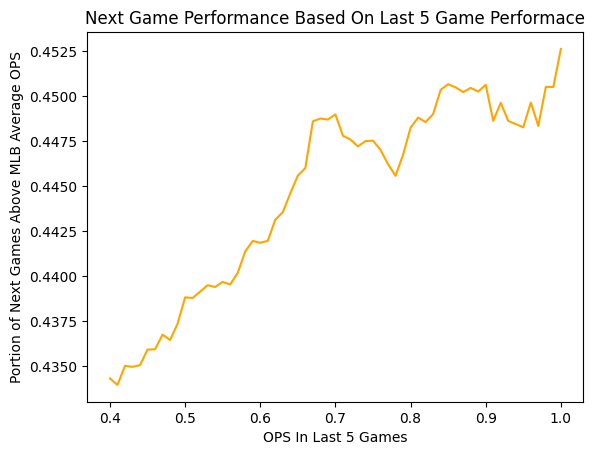

In [9]:
'''
This cell plots the values from the previous cell.
'''

plt.plot(x_range, y_range_pa_l5, color = "orange")
plt.xlabel("OPS In Last 5 Games")
plt.ylabel("Portion of Next Games Above MLB Average OPS")
plt.title("Next Game Performance Based On Last 5 Game Performace")
plt.show()



In [10]:
'''
This cell gets values from the lastgame function for ranges of lops. Essentially it will find the percentage of
games where players had at least an i OPS over their last 5 games, where i is a number between .4 and 1.0
'''

import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(0.4, 1.0, 61)
y_range_l5 = []

for i in x_range:
    y_value = lastgame(5, i)
    y_range_l5.append(y_value)


/tmp/ipython-input-6-706898314.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table2["New_Name"].fillna(False, inplace = True)
/tmp/ipython-input-6-706898314.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

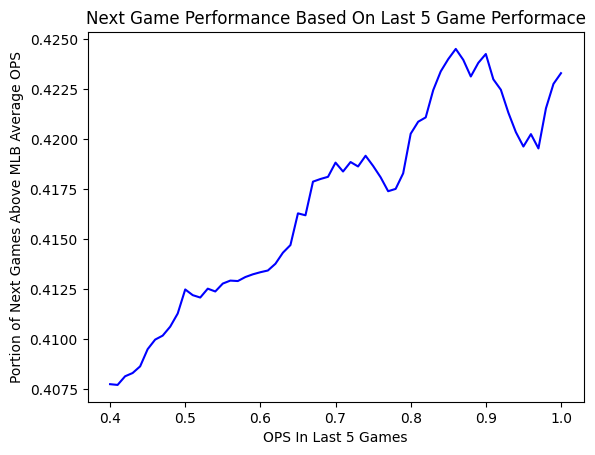

In [11]:
# This cell plots just l5

plt.plot(x_range, y_range_l5, color = "blue")
plt.xlabel("OPS In Last 5 Games")
plt.ylabel("Portion of Next Games Above MLB Average OPS")
plt.title("Next Game Performance Based On Last 5 Game Performace")
# plt.yticks(np.linspace(.4,.6,9))
plt.show()


In [12]:
'''
This cell gets values from the paops function for ranges of lops. Essentially it will find the percentage of
games where players had at least an i OPS over the course of a season granted they have at least 250 plate appearances,
where i is a number between .4 and 1.0
'''


x_range = np.linspace(0.4, 1.0, 61)
y_range_pa = []

for i in x_range:
    y_value = paops(250, i)
    y_range_pa.append(y_value)


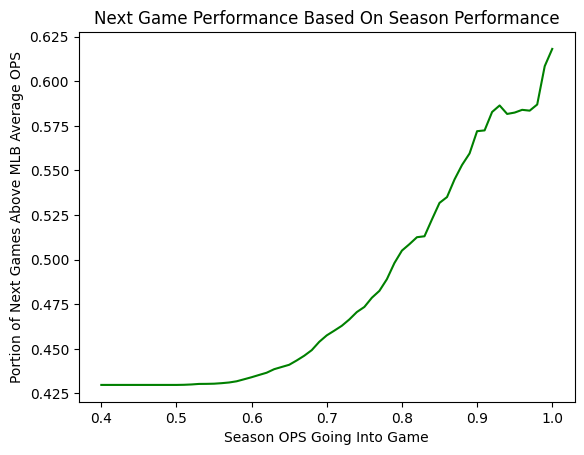

In [13]:
# This cell plots just PA

plt.plot(x_range, y_range_pa, color = "green")
plt.xlabel("Season OPS Going Into Game")
plt.ylabel("Portion of Next Games Above MLB Average OPS")
plt.title("Next Game Performance Based On Season Performance")
plt.show()


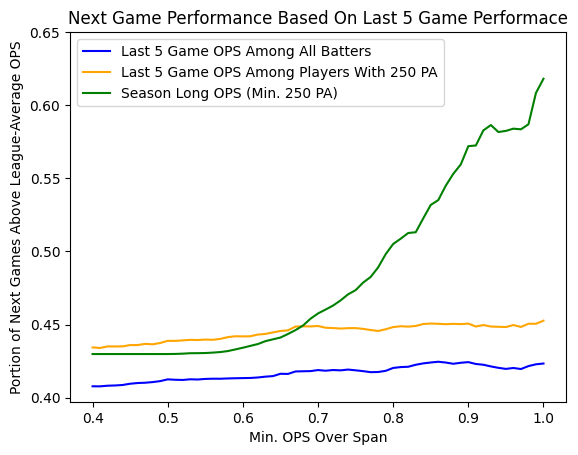

In [14]:
# This cell plots both l5, and l5/pa

plt.plot(x_range, y_range_l5, label = "Last 5 Game OPS Among All Batters", color = "blue")
plt.plot(x_range, y_range_pa_l5, label = "Last 5 Game OPS Among Players With 250 PA", color = "orange")
plt.plot(x_range, y_range_pa, label = "Season Long OPS (Min. 250 PA)", color = "green")
plt.xlabel("Min. OPS Over Span")
plt.ylabel("Portion of Next Games Above League-Average OPS")
plt.title("Next Game Performance Based On Last 5 Game Performace")
plt.yticks(np.linspace(.4,.65,6))
plt.legend()
plt.show()

In [15]:
'''
This cell gets values from the goodszn_badstreak function for ranges of sops. Essentially it will find the percentage
of games where players had at least 250 plate appearances over the season, an above league-average OPS over their last
5 games, and an OPS of at LEAST i over the course of the season
'''

import numpy as np

x_range_1 = np.linspace(0.6,1,41)
y_range_gsznbs = []

for i in x_range_1:
    y_value = goodszn_badstreak(250, 5, .734, i)
    y_range_gsznbs.append(y_value)



/tmp/ipython-input-4-4081867518.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table2["New_Name"].fillna(False, inplace = True)
/tmp/ipython-input-4-4081867518.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [16]:
'''
This cell gets values from the badszn_goodstreak function for ranges of sops. Essentially it will find the percentage
of games where players had at least 250 plate appearances over the season, an above league-average OPS over their last
5 games, and an OPS of at MOST i over the course of the season
'''

import numpy as np

x_range_1 = np.linspace(0.6, 1, 41)
y_range_bszngs = []

for i in x_range_1:
    y_value = badszn_goodstreak(250, 5, .734, sops = i)
    y_range_bszngs.append(y_value)


/tmp/ipython-input-5-1157180694.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  table2["New_Name"].fillna(False, inplace = True)
/tmp/ipython-input-5-1157180694.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal',

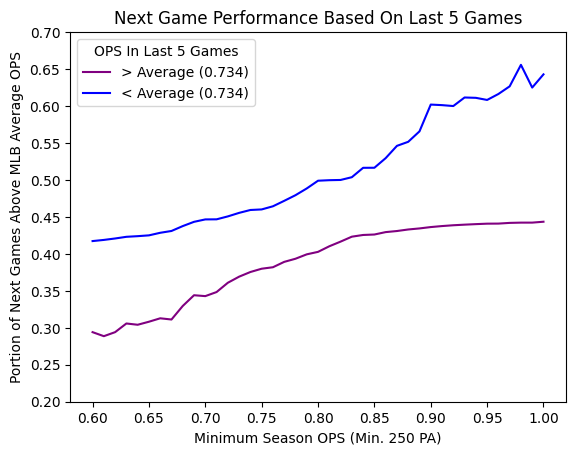

In [17]:
# This cell plots good szn bad streak
x_range_2 = np.linspace(0.6,1,41)
plt.plot(x_range_2, y_range_bszngs, label = "> Average (0.734)", color = "purple")
plt.plot(x_range_2, y_range_gsznbs, label = "< Average (0.734)", color = "blue")
plt.yticks(np.linspace(.2,.7,11))
plt.xlabel("Minimum Season OPS (Min. 250 PA)")
plt.ylabel("Portion of Next Games Above MLB Average OPS")
plt.title("Next Game Performance Based On Last 5 Games")
legend = plt.legend(title = "OPS In Last 5 Games")
plt.setp(legend.get_title())
plt.show()